In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
# Separate scaler for the target variable
target_scaler = MinMaxScaler()
feature_scaler = MinMaxScaler()

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:
df.set_index('Unnamed: 0', inplace=True)

In [5]:
df

,Open_NVDA,Lag_Close_1,MA10_,EMA10_,MA50_,Lag_Close_3,Close_NVDA
Unnamed: 0,,,,,,,
0,0.040119,0.037612,0.037289,0.037612,0.039066,0.037612,0.037612
1,0.040597,0.037612,0.037289,0.038328,0.039066,0.037612,0.041552
2,0.040597,0.041552,0.037289,0.038328,0.039066,0.037612,0.041552
3,0.040597,0.041552,0.037289,0.038328,0.039066,0.037612,0.041552
4,0.042029,0.041552,0.037289,0.038328,0.039066,0.041552,0.038328
...,...,...,...,...,...,...,...
9632,142.509995,139.990005,137.815001,138.076883,118.404400,141.220001,141.720001
9633,143.190002,141.720001,138.949002,138.904724,119.028400,141.919998,142.630005
9634,143.190002,142.630005,138.949002,138.904724,119.028400,139.990005,142.630005


In [6]:
# Create lagged features for Close_diff_NVDA

lags_to_add = [1, 2, 3]  # Specify the lags to include

for lag in lags_to_add:
    df[f'Lag_Close_diff_{lag}'] = df['Close_NVDA'].shift(lag)

In [7]:
df = df.bfill()

In [8]:
df['Close_NVDA'] = target_scaler.fit_transform(df[['Close_NVDA']])  # Target variable
df[df.columns.difference(['Close_NVDA'])] = feature_scaler.fit_transform(df[df.columns.difference(['Close_NVDA'])])

In [9]:
df

,Open_NVDA,Lag_Close_1,MA10_,EMA10_,MA50_,Lag_Close_3,Close_NVDA,Lag_Close_diff_1,Lag_Close_diff_2,Lag_Close_diff_3
Unnamed: 0,,,,,,,,,,
0,0.000053,0.000042,0.000034,0.000034,0.000039,0.000042,0.000042,0.000042,0.000042,0.000042
1,0.000056,0.000042,0.000034,0.000039,0.000039,0.000042,0.000069,0.000042,0.000042,0.000042
2,0.000056,0.000069,0.000034,0.000039,0.000039,0.000042,0.000069,0.000069,0.000042,0.000042
3,0.000056,0.000069,0.000034,0.000039,0.000039,0.000042,0.000069,0.000069,0.000069,0.000042
4,0.000066,0.000069,0.000034,0.000039,0.000039,0.000069,0.000047,0.000069,0.000069,0.000069
...,...,...,...,...,...,...,...,...,...,...
9632,0.931327,0.936900,0.945295,0.953488,0.845836,0.945133,0.948480,0.936900,0.949819,0.945133
9633,0.935772,0.948480,0.953075,0.959206,0.850295,0.949819,0.954572,0.948480,0.936900,0.949819
9634,0.935772,0.954572,0.953075,0.959206,0.850295,0.936900,0.954572,0.954572,0.948480,0.936900


In [10]:
import numpy as np

In [11]:
# Ensure the target column is defined
target_column = 'Close_NVDA'
sequence_length = 10

# Get the index of the target column
target_index = df.columns.get_loc(target_column)

In [12]:
# Prepare sequences
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df.iloc[i:i + sequence_length].values)  # Input sequence
    y.append(df.iloc[i + sequence_length, target_index])  # Target value

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [13]:
X.shape, y.shape

((9627, 10, 10), (9627,))

In [14]:
# Convert the DataFrame to a NumPy array, excluding the index
data_values = df.values

In [15]:
# Initialize as Python lists
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

# Split data manually into train, validation, and test sets
train_size = int(len(data_values) * 0.7)
val_size = int(len(data_values) * 0.85)

for i in range(len(data_values) - sequence_length):
    if i + sequence_length <= train_size:
        # Add to training data
        X_train.append(data_values[i:i + sequence_length])  # Input sequence
        y_train.append(data_values[i + sequence_length, target_index])  # Target value
    elif i + sequence_length <= val_size:
        # Add to validation data
        X_val.append(data_values[i:i + sequence_length])
        y_val.append(data_values[i + sequence_length, target_index])
    else:
        # Add to test data
        X_test.append(data_values[i:i + sequence_length])
        y_test.append(data_values[i + sequence_length, target_index])

# Convert to NumPy arrays after appending
X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)


In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6736, 10, 10), (6736,), (1446, 10, 10), (1446,), (1445, 10, 10), (1445,))

In [17]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Single output
])

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the GRU model
batch_size = 32
epochs = 50

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.2105e-05 - mae: 0.0020 - val_loss: 5.6949e-06 - val_mae: 0.0016
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8624e-08 - mae: 1.6882e-04 - val_loss: 5.1239e-06 - val_mae: 0.0015
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1441e-08 - mae: 1.3027e-04 - val_loss: 4.9318e-06 - val_mae: 0.0015
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5823e-08 - mae: 1.6805e-04 - val_loss: 6.5233e-06 - val_mae: 0.0018
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4361e-08 - mae: 1.6281e-04 - val_loss: 4.8964e-06 - val_mae: 0.0015
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8980e-08 - mae: 1.3857e-04 - val_loss: 3.9505e-06 - val_mae: 0.0013
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9686e-08 - mae: 1.8173e-04 - val_loss: 4.9123e-06 - val_mae: 0.0015
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.4578e-08 - mae: 2.1436e-04 - val

In [23]:
import matplotlib.pyplot as plt

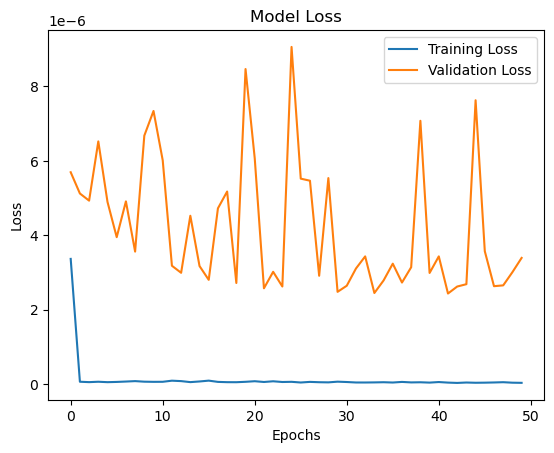

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {mse}")
print(f"Unscaled Test MAE: {mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Unscaled Test MSE: 10.56199987894148
Unscaled Test MAE: 2.0053113620586465


In [27]:
# Function to create a GRU model with given hyperparameters
def create_gru_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)  # Single output
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [28]:
# Example: Define a model with specific hyperparameters
model = create_gru_model(units_layer1=128, units_layer2=64, dropout_rate=0.3, learning_rate=0.001)
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import itertools
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameter space
param_grid = {
    'units_layer1': [64, 128],
    'units_layer2': [32, 64],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0005]
}

In [30]:
# Generate all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

In [31]:
# Store results
results = []

In [32]:
# Perform grid search
for params in param_combinations:
    units_layer1, units_layer2, dropout_rate, learning_rate = params

    print(f"Training with params: {params}")
    
    # Create model with current hyperparameters
    model = create_gru_model(
        units_layer1=units_layer1,
        units_layer2=units_layer2,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0,  # Suppress detailed output
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Predict on validation set
    val_predictions = model.predict(X_val, verbose=0)
    
    # Unscale y_val and predictions
    y_val_unscaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
    val_predictions_unscaled = target_scaler.inverse_transform(val_predictions.reshape(-1, 1))
    
    # Calculate MSE and MAE on unscaled validation set
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    val_mse_unscaled = mean_squared_error(y_val_unscaled, val_predictions_unscaled)
    val_mae_unscaled = mean_absolute_error(y_val_unscaled, val_predictions_unscaled)

    # Append results
    results.append((params, val_mse_unscaled, val_mae_unscaled))

Training with params: (64, 32, 0.2, 0.001)
Training with params: (64, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (64, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with params: (128, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Find the best hyperparameters
best_params = sorted(results, key=lambda x: x[1])[0]

In [34]:
# Display the best hyperparameters and their validation loss
print("Best Parameters:", best_params[0])
print("Validation Loss:", best_params[1])
print("Validation MAE:", best_params[2])

Best Parameters: (128, 64, 0.3, 0.001)
Validation Loss: 0.05430809056113475
Validation MAE: 0.1504221775389971


In [35]:
import numpy as np
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [36]:
# Retrain the model with the best hyperparameters
best_model = create_gru_model(
    units_layer1=best_params[0][0], 
    units_layer2=best_params[0][1], 
    dropout_rate=best_params[0][2], 
    learning_rate=best_params[0][3]
)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
best_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                         │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model on the full training set
history_best = best_model.fit(
    X_final_train, y_final_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1894e-05 - mae: 0.0023
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0960e-06 - mae: 6.1046e-04
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4183e-06 - mae: 6.8867e-04
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0244e-06 - mae: 6.1894e-04
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1865e-06 - mae: 6.6762e-04
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2598e-06 - mae: 7.9079e-04
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7392e-07 - mae: 6.4048e-04
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7519e-07 - mae: 6.5043e-04
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8920e-07 - mae: 6.0327e-04
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6941e-07 - mae: 5.0181e-04
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3426e-07 - mae: 5.4566e-04
Epoch 12/50
256/256 ━━━

In [39]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(best_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {mse}")
print(f"Unscaled Test MAE: {mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Unscaled Test MSE: 4.712831727804385
Unscaled Test MAE: 1.2000760246725646


In [40]:
# Previous Closing Price as reference
# Use the last value of y_test as predictions (lag-1 prediction)
previous_closing_predictions = X_test[:, -1, 0]

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
# Unscale y_test and naive predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
previous_predictions_unscaled = target_scaler.inverse_transform(X_test[:, -1, 0].reshape(-1, 1))  # Assuming X_test[:, -1, 0] represents the previous day's price

# Calculate MSE and MAE for the naive model
previous_mse = mean_squared_error(y_test_unscaled, previous_predictions_unscaled)
previous_mae = mean_absolute_error(y_test_unscaled, previous_predictions_unscaled)

print(f"Previous Model Unscaled MSE: {previous_mse}")
print(f"Previous Model Unscaled MAE: {previous_mae}")

Previous Model Unscaled MSE: 10.829621997831993
Previous Model Unscaled MAE: 2.124724443925987


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# Reshape the data for linear regression (flatten time steps and features)
X_train_flat = X_final_train.reshape(X_final_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_final_train)

LinearRegression()

In [46]:
# Predict on the test set
lr_predictions = lr_model.predict(X_test_flat)

In [47]:
# Unscale y_test and linear regression predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
lr_predictions_unscaled = target_scaler.inverse_transform(lr_predictions.reshape(-1, 1))

# Calculate MSE and MAE for the linear regression model
lr_mse = mean_squared_error(y_test_unscaled, lr_predictions_unscaled)
lr_mae = mean_absolute_error(y_test_unscaled, lr_predictions_unscaled)

print(f"Linear Regression Unscaled MSE: {lr_mse}")
print(f"Linear Regression Unscaled MAE: {lr_mae}")

Linear Regression Unscaled MSE: 4.611140868291689
Linear Regression Unscaled MAE: 1.1300083146481286


In [48]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_data = df['Close_NVDA']

In [49]:
sarima_data

Unnamed: 0
0       0.000042
1       0.000069
2       0.000069
3       0.000069
4       0.000047
          ...   
9632    0.948480
9633    0.954572
9634    0.954572
9635    0.954572
9636    0.963475
Name: Close_NVDA, Length: 9637, dtype: float64

In [50]:
# Split into train and test sets
train_sarima = sarima_data[:len(X_final_train)]
test_sarima = sarima_data[len(X_final_train):]

In [51]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_sarima, 
                       order=(1, 0, 1),  # ARIMA parameters (p, d, q)
                       seasonal_order=(1, 1, 0, 5),  # Seasonal order (P, D, Q, s)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()

In [52]:
# Make predictions on the test set
sarima_predictions = sarima_results.predict(start=len(train_sarima), end=len(train_sarima) + len(test_sarima) - 1)

In [53]:
# Unscale y_test and SARIMA predictions
test_sarima_unscaled = target_scaler.inverse_transform(
    test_sarima.to_numpy().reshape(-1, 1)
)
sarima_predictions_unscaled = target_scaler.inverse_transform(
    sarima_predictions.to_numpy().reshape(-1, 1)
)

# Calculate MSE and MAE for the SARIMA model
sarima_mse = mean_squared_error(test_sarima_unscaled, sarima_predictions_unscaled)
sarima_mae = mean_absolute_error(test_sarima_unscaled, sarima_predictions_unscaled)

print(f"SARIMA Unscaled MSE: {sarima_mse}")
print(f"SARIMA Unscaled MAE: {sarima_mae}")


SARIMA Unscaled MSE: 3608.8417053489393
SARIMA Unscaled MAE: 40.82447539586946


In [54]:
from tensorflow.keras.layers import LSTM

In [55]:
def create_lstm_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)  # Single output
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [56]:
lstm_model = create_lstm_model(units_layer1=64, units_layer2=32, dropout_rate=0.2, learning_rate=0.001)
lstm_model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9283e-06 - mae: 0.0010 - val_loss: 7.1084e-06 - val_mae: 0.0018
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6770e-08 - mae: 1.6772e-04 - val_loss: 6.2099e-06 - val_mae: 0.0017
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8319e-08 - mae: 1.8136e-04 - val_loss: 7.4122e-06 - val_mae: 0.0019
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1696e-08 - mae: 1.8608e-04 - val_loss: 5.7488e-06 - val_mae: 0.0017
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0439e-08 - mae: 1.8326e-04 - val_loss: 5.0537e-06 - val_mae: 0.0015
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4023e-08 - mae: 1.6832e-04 - val_loss: 1.0559e-05 - val_mae: 0.0024
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1388e-07 - mae: 2.3430e-04 - val_loss: 5.7128e-06 - val_mae: 0.0017
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1901e-08 - mae: 1.6399e-04 - val

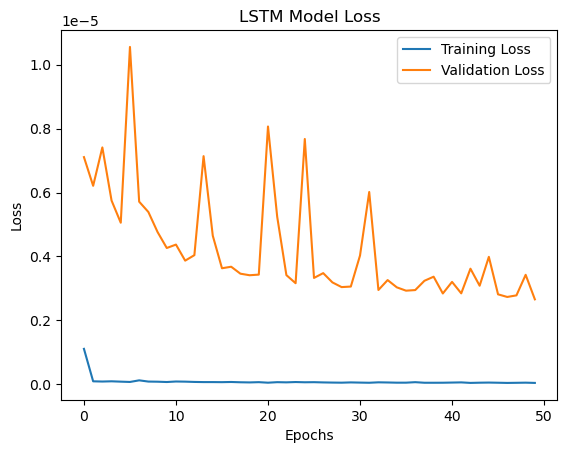

In [58]:
# Plot the training and validation loss for the LSTM model
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
# Unscale y_test and GRU/LSTM predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_unscaled = target_scaler.inverse_transform(lstm_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE for the GRU/LSTM model
lstm_mse = mean_squared_error(y_test_unscaled, lstm_predictions_unscaled)
lstm_mae = mean_absolute_error(y_test_unscaled, lstm_predictions_unscaled)

print(f"LSTM Unscaled MSE: {lstm_mse}")
print(f"LSTM Unscaled MAE: {lstm_mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Unscaled MSE: 13.937549585284092
LSTM Unscaled MAE: 2.2465812353114356


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define hyperparameter combinations for the grid search
lstm_param_combinations = [
    (units_layer1, units_layer2, dropout_rate, learning_rate)
    for units_layer1 in [64, 128]
    for units_layer2 in [32, 64]
    for dropout_rate in [0.2, 0.3]
    for learning_rate in [0.001, 0.0005]
]

lstm_results = []

# Perform grid search
for params in lstm_param_combinations:
    units_layer1, units_layer2, dropout_rate, learning_rate = params

    print(f"Training LSTM with params: {params}")

    # Create model with current hyperparameters
    lstm_model = create_lstm_model(
        units_layer1=units_layer1,
        units_layer2=units_layer2,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate
    )

    # Train the model
    history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0,  # Suppress detailed output
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

    # Predict on validation set
    val_predictions = lstm_model.predict(X_val, verbose=0)

    # Unscale y_val and predictions
    y_val_unscaled = target_scaler.inverse_transform(y_val.reshape(-1, 1))
    val_predictions_unscaled = target_scaler.inverse_transform(val_predictions.reshape(-1, 1))

    # Calculate MSE and MAE on unscaled validation set
    val_mse_unscaled = mean_squared_error(y_val_unscaled, val_predictions_unscaled)
    val_mae_unscaled = mean_absolute_error(y_val_unscaled, val_predictions_unscaled)

    # Append results
    lstm_results.append((params, val_mse_unscaled, val_mae_unscaled))

# Find the best hyperparameters
best_lstm_params = sorted(lstm_results, key=lambda x: x[1])[0]  # Sort by MSE

# Display the best hyperparameters and their validation loss
print("Best LSTM Parameters:", best_lstm_params[0])
print("Validation MSE (Unscaled):", best_lstm_params[1])
print("Validation MAE (Unscaled):", best_lstm_params[2])


Training LSTM with params: (64, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (64, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 32, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.2, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.2, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.3, 0.001)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM with params: (128, 64, 0.3, 0.0005)


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best LSTM Parameters: (128, 64, 0.2, 0.001)
Validation MSE (Unscaled): 0.056782973415129404
Validation MAE (Unscaled): 0.1547922425250295


In [61]:
# Find the best hyperparameters
best_lstm_params = sorted(lstm_results, key=lambda x: x[1])[0]

In [62]:
# Display the best hyperparameters and their validation loss
print("Best Parameters:", best_lstm_params[0])
print("Validation Loss:", best_lstm_params[1])
print("Validation MAE:", best_lstm_params[2])

Best Parameters: (128, 64, 0.2, 0.001)
Validation Loss: 0.056782973415129404
Validation MAE: 0.1547922425250295


In [63]:
import numpy as np
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [64]:
# Retrain the model with the best hyperparameters
best_lstm_model = create_lstm_model(
    units_layer1=best_lstm_params[0][0], 
    units_layer2=best_lstm_params[0][1], 
    dropout_rate=best_lstm_params[0][2], 
    learning_rate=best_lstm_params[0][3]
)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
best_lstm_model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model on the full training set
history_lstm_best = best_lstm_model.fit(
    X_final_train, y_final_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3641e-05 - mae: 0.0029
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3717e-06 - mae: 5.7649e-04
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5394e-06 - mae: 7.8071e-04
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0297e-06 - mae: 5.6943e-04
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6646e-06 - mae: 8.0152e-04
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3235e-06 - mae: 7.4048e-04
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6554e-07 - mae: 5.5903e-04
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2732e-06 - mae: 7.2831e-04
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1328e-06 - mae: 6.3613e-04
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7217e-07 - mae: 5.2468e-04
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1326e-06 - mae: 6.6657e-04
Epoch 12/50
256/256 ━━━

In [67]:
# Unscale y_test and predictions using the target_scaler
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_unscaled = target_scaler.inverse_transform(best_lstm_model.predict(X_test).reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
lstm_mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
lstm_mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print(f"Unscaled Test MSE: {lstm_mse}")
print(f"Unscaled Test MAE: {lstm_mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Unscaled Test MSE: 6.034305892320121
Unscaled Test MAE: 1.5610272542828094


In [68]:
n_rows_to_display = 50

In [69]:
gru_train_predictions = best_model.predict(X_train)
gru_test_predictions = best_model.predict(X_test)

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [70]:
lstm_train_predictions = best_lstm_model.predict(X_train)
lstm_test_predictions = best_lstm_model.predict(X_test)

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
# Previous closing price predictions for training and testing data
previous_train_predictions = X_train[:, -1, 0]
previous_test_predictions = X_test[:, -1, 0]

In [72]:
# Linear Regression predictions for training and testing data
lr_train_predictions = lr_model.predict(X_train.reshape(X_train.shape[0], -1))
lr_test_predictions = lr_model.predict(X_test_flat)

In [73]:
# Unscale the actual values and predictions
y_train_unscaled = target_scaler.inverse_transform(y_train.reshape(-1, 1))[-n_rows_to_display:]
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))[-n_rows_to_display:]

gru_train_predictions_unscaled = target_scaler.inverse_transform(gru_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
gru_test_predictions_unscaled = target_scaler.inverse_transform(gru_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

lstm_train_predictions_unscaled = target_scaler.inverse_transform(lstm_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
lstm_test_predictions_unscaled = target_scaler.inverse_transform(lstm_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

previous_train_predictions_unscaled = target_scaler.inverse_transform(previous_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
previous_test_predictions_unscaled = target_scaler.inverse_transform(previous_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

lr_train_predictions_unscaled = target_scaler.inverse_transform(lr_train_predictions.reshape(-1, 1))[-n_rows_to_display:]
lr_test_predictions_unscaled = target_scaler.inverse_transform(lr_test_predictions.reshape(-1, 1))[-n_rows_to_display:]

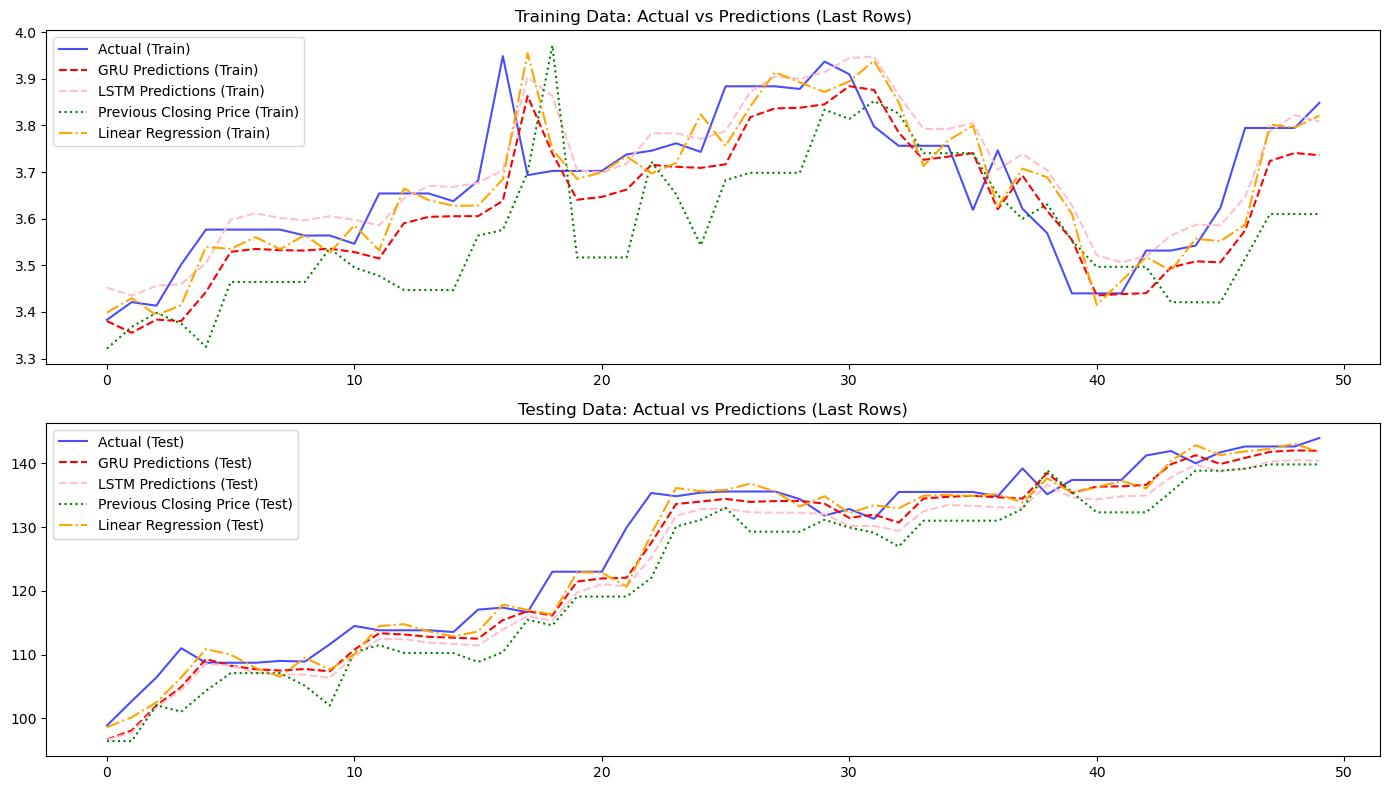

In [74]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot actual vs. predicted for training data
plt.subplot(2, 1, 1)
plt.plot(y_train_unscaled, label='Actual (Train)', color='blue', linestyle='-', alpha=0.7)
plt.plot(gru_train_predictions_unscaled, label='GRU Predictions (Train)', color='red', linestyle='--')
plt.plot(lstm_train_predictions_unscaled, label='LSTM Predictions (Train)', color='pink', linestyle='--')
plt.plot(previous_train_predictions_unscaled, label='Previous Closing Price (Train)', color='green', linestyle=':')
plt.plot(lr_train_predictions_unscaled, label='Linear Regression (Train)', color='orange', linestyle='-.')
plt.title('Training Data: Actual vs Predictions (Last Rows)')
plt.legend()

# Plot actual vs. predicted for testing data
plt.subplot(2, 1, 2)
plt.plot(y_test_unscaled, label='Actual (Test)', color='blue', linestyle='-', alpha=0.7)
plt.plot(gru_test_predictions_unscaled, label='GRU Predictions (Test)', color='red', linestyle='--')
plt.plot(lstm_test_predictions_unscaled, label='LSTM Predictions (Test)', color='pink', linestyle='--')
plt.plot(previous_test_predictions_unscaled, label='Previous Closing Price (Test)', color='green', linestyle=':')
plt.plot(lr_test_predictions_unscaled, label='Linear Regression (Test)', color='orange', linestyle='-.')
plt.title('Testing Data: Actual vs Predictions (Last Rows)')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
# Data for MSE and MAE
models = ['LSTM', 'Previous', 'Linear Regression', 'SARIMA']
mse_values = [lstm_mse, previous_mse, lr_mse, sarima_mse]
mae_values = [lstm_mae, previous_mae, lr_mae, sarima_mae]

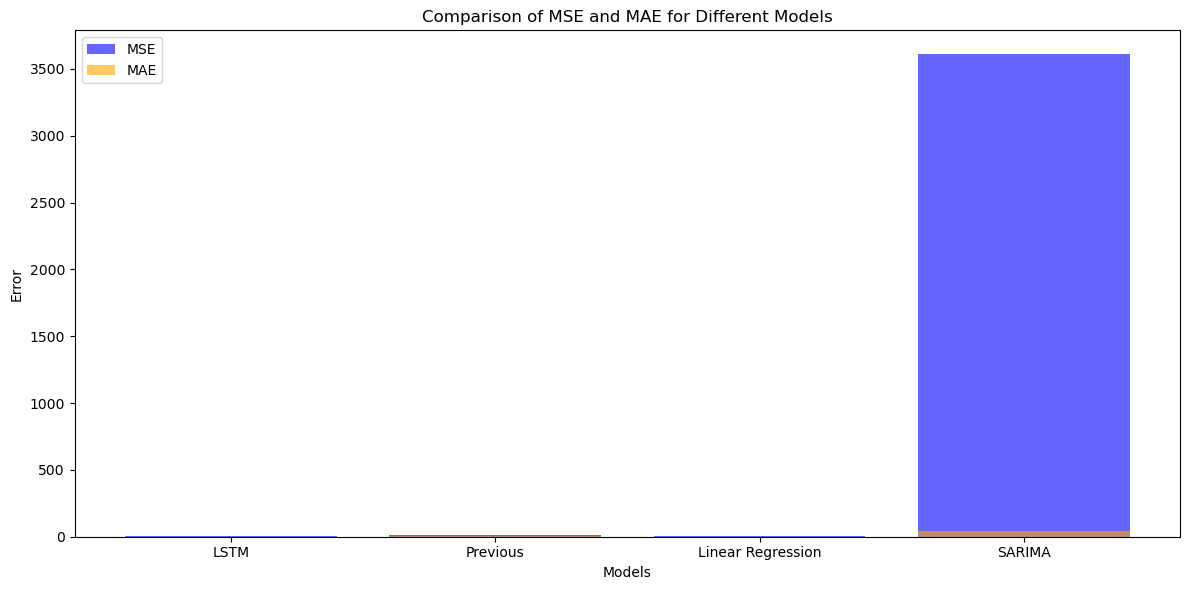

In [76]:
# Plotting MSE
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='blue', alpha=0.6, label='MSE')
plt.bar(models, mae_values, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
# Data for MSE and MAE (without SARIMA)
models = ['LSTM', 'Previous', 'Linear Regression']
mse_values = [lstm_mse, previous_mse, lr_mse]
mae_values = [lstm_mae, previous_mae, lr_mae]

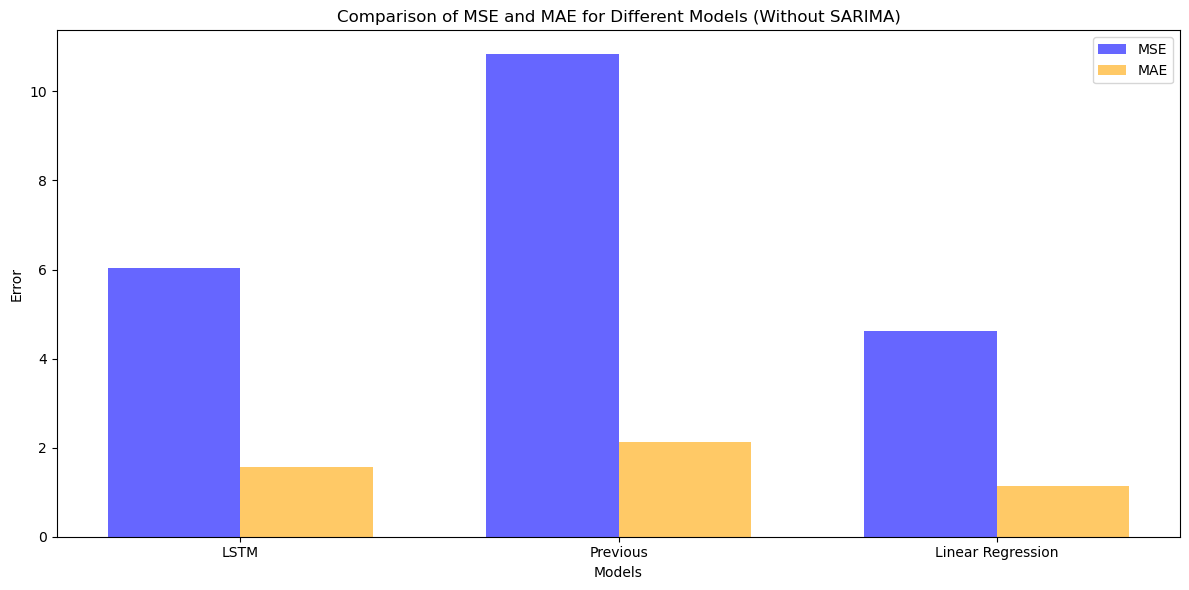

In [78]:
# Plotting MSE and MAE
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.bar([i + bar_width for i in index], mae_values, bar_width, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models (Without SARIMA)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [80]:
gru_predictions = best_model.predict(X_test)
lr_predictions = lr_model.predict(X_test_flat)
previous_predictions = X_test[:, -1, 0]  # Using previous closing price as prediction

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [81]:
meta_model_input = np.column_stack((gru_predictions, lr_predictions, previous_predictions))

In [82]:
meta_model = LinearRegression()
meta_model.fit(meta_model_input, y_test)

LinearRegression()

In [83]:
meta_model_predictions = meta_model.predict(meta_model_input)

In [84]:
# Unscale y_test and meta-model predictions
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
meta_model_predictions_unscaled = target_scaler.inverse_transform(meta_model_predictions.reshape(-1, 1))

# Calculate MSE and MAE on unscaled data
meta_mse = mean_squared_error(y_test_unscaled, meta_model_predictions_unscaled)
meta_mae = mean_absolute_error(y_test_unscaled, meta_model_predictions_unscaled)

print(f"Meta-Model (Stacking) MSE: {meta_mse}")
print(f"Meta-Model (Stacking) MAE: {meta_mae}")

Meta-Model (Stacking) MSE: 4.328257000715158
Meta-Model (Stacking) MAE: 1.072908418159104


In [85]:
models = ['LSTM', 'Previous', 'Linear Regression', 'Meta-Model (Stacking)']
mse_values = [lstm_mse, previous_mse, lr_mse, meta_mse]
mae_values = [lstm_mae, previous_mae, lr_mae, meta_mae]

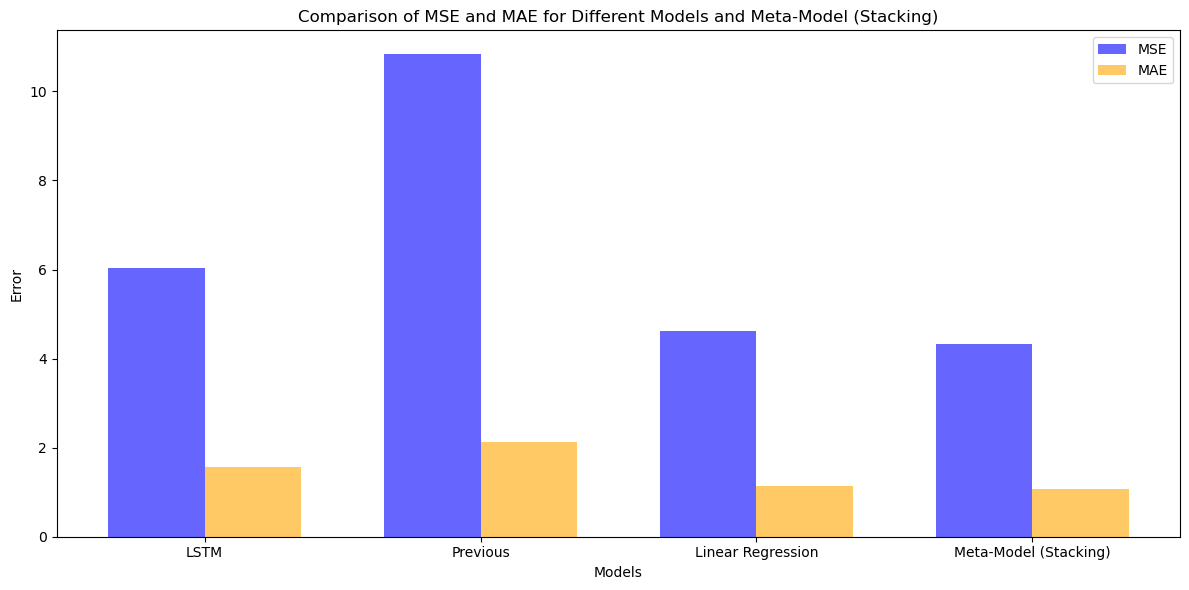

In [86]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.bar([i + bar_width for i in index], mae_values, bar_width, color='orange', alpha=0.6, label='MAE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
models = ['LSTM', 'Previous', 'Linear Regression', 'Meta-Model (Stacking)']
mse_values = [lstm_mse, previous_mse, lr_mse, meta_mse]

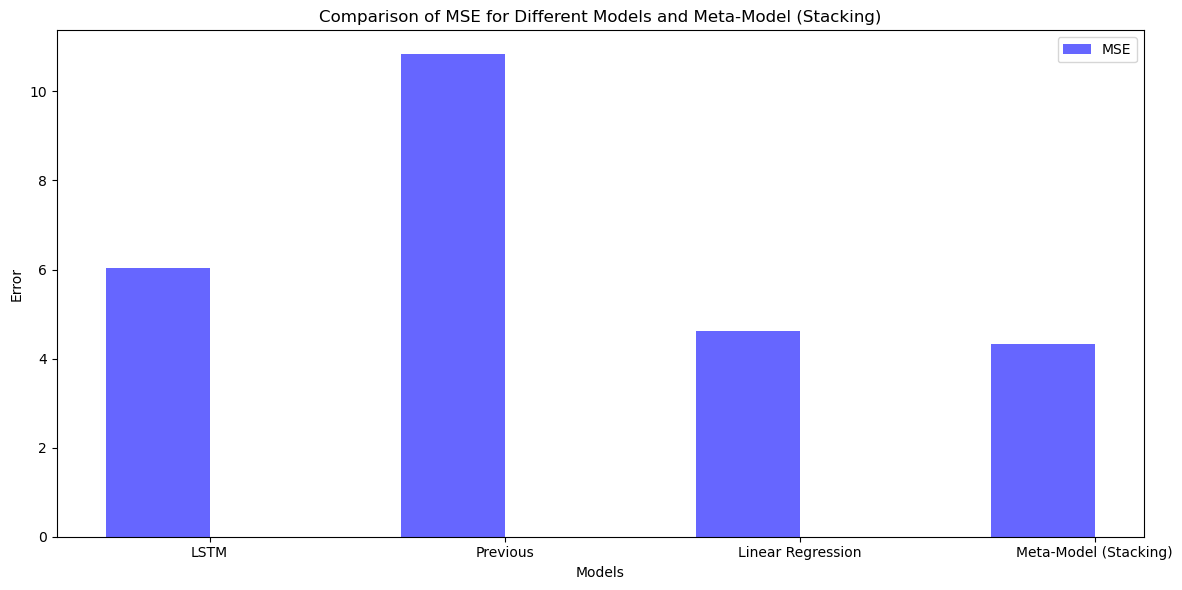

In [88]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
models = ['Linear Regression', 'Meta Model']
mse_values = [lr_mse, meta_mse]

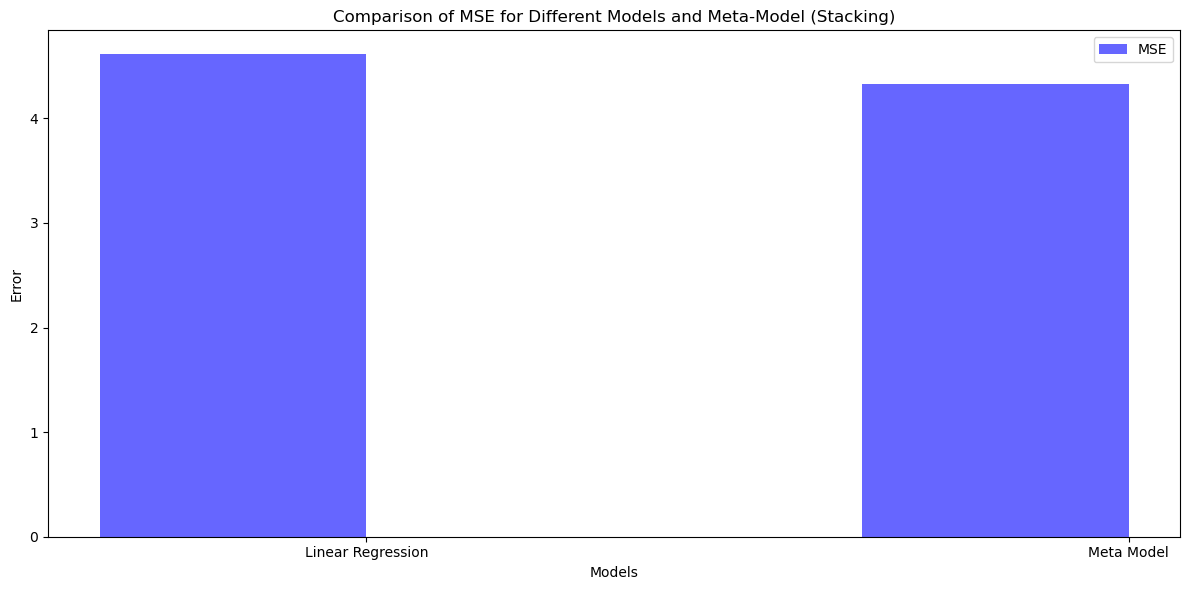

In [90]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, mse_values, bar_width, color='blue', alpha=0.6, label='MSE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE for Different Models and Meta-Model (Stacking)')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
meta_test_predictions_unscaled = target_scaler.inverse_transform(meta_model_predictions.reshape(-1, 1))[-n_rows_to_display:]

In [92]:
# Unscale the actual values and predictions
y_train_unscaled = target_scaler.inverse_transform(y_train.reshape(-1, 1))[-n_rows_to_display:]
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))[-n_rows_to_display:]

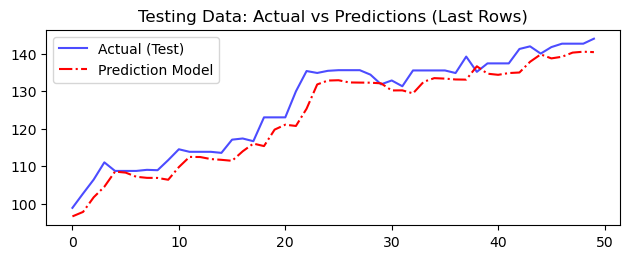

In [93]:
# Plot actual vs. predicted for testing data
plt.subplot(2, 1, 2)
plt.plot(y_test_unscaled, label='Actual (Test)', color='blue', linestyle='-', alpha=0.7)
plt.plot(lstm_test_predictions_unscaled, label='Prediction Model', color='red', linestyle='-.')
plt.title('Testing Data: Actual vs Predictions (Last Rows)')
plt.legend()

plt.tight_layout()
plt.show()

In [228]:
df = pd.read_csv("cleaned.csv")

In [230]:
date = df['Unnamed: 0']

In [232]:
date

0       1999-01-22
1       1999-01-23
2       1999-01-24
3       1999-01-25
4       1999-01-26
           ...    
9632    2025-06-06
9633    2025-06-07
9634    2025-06-08
9635    2025-06-09
9636    2025-06-10
Name: Unnamed: 0, Length: 9637, dtype: object

In [234]:
# Calculate the indices for splitting
train_size = int(len(date) * 0.7)
val_size = int(len(date) * 0.85)

# Split the date column into training, validation, and test sets
date_train = date[:train_size]
date_val = date[train_size:val_size]
date_test = date[val_size:]

# Show the splits for the date column
(date_train.head(), date_val.head(), date_test.head())

(0    1999-01-22
 1    1999-01-23
 2    1999-01-24
 3    1999-01-25
 4    1999-01-26
 Name: Unnamed: 0, dtype: object,
 6745    2017-07-11
 6746    2017-07-12
 6747    2017-07-13
 6748    2017-07-14
 6749    2017-07-15
 Name: Unnamed: 0, dtype: object,
 8191    2021-06-26
 8192    2021-06-27
 8193    2021-06-28
 8194    2021-06-29
 8195    2021-06-30
 Name: Unnamed: 0, dtype: object)

In [256]:
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_unscaled.size

1445

In [262]:
date_test.size

1446

In [282]:
date_test = date_test.iloc[1:]

In [284]:
predictions_unscaled = target_scaler.inverse_transform(best_lstm_model.predict(X_test).reshape(-1, 1))
predictions_unscaled.size

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1445

In [286]:
predictions = pd.DataFrame()

In [352]:
X_test

array([[[0.11573803, 0.11876996, 0.12132421, ..., 0.11876996,
         0.11862465, 0.12016282],
        [0.12232322, 0.12442828, 0.12205306, ..., 0.12442828,
         0.11876996, 0.11862465],
        [0.12004824, 0.12430468, 0.12260921, ..., 0.12430468,
         0.12442828, 0.11876996],
        ...,
        [0.1252179 , 0.12710041, 0.12597317, ..., 0.12710041,
         0.12596141, 0.12289178],
        [0.12556202, 0.12809077, 0.12679871, ..., 0.12809077,
         0.12710041, 0.12596141],
        [0.12608877, 0.12692508, 0.12814495, ..., 0.12692508,
         0.12809077, 0.12710041]],

       [[0.12232322, 0.12442828, 0.12205306, ..., 0.12442828,
         0.11876996, 0.11862465],
        [0.12004824, 0.12430468, 0.12260921, ..., 0.12430468,
         0.12442828, 0.11876996],
        [0.12004824, 0.12289178, 0.12260921, ..., 0.12289178,
         0.12430468, 0.12442828],
        ...,
        [0.12556202, 0.12809077, 0.12679871, ..., 0.12809077,
         0.12710041, 0.12596141],
        [0.1

In [348]:
X_test_unscaled = feature_scaler.inverse_transform(X_test)

ValueError: Found array with dim 3. None expected <= 2.

In [346]:
X_test_unscaled

array([[17.32080531],
       [17.77372932],
       [18.15529597],
       [18.17194101],
       [16.62577749],
       [17.98180199],
       [18.61899757],
       [17.77372932],
       [17.75202179],
       [17.98180199],
       [18.30453267],
       [18.61899757],
       [18.26417559],
       [18.35704046],
       [16.71792343],
       [17.75202179],
       [18.60053253],
       [18.61899757],
       [17.77372932],
       [17.75202179],
       [17.96468545],
       [18.60053253],
       [18.34725588],
       [18.46888883],
       [16.80379549],
       [17.77372932],
       [18.38946724],
       [18.60053253],
       [18.61899757],
       [17.77372932],
       [17.96468545],
       [18.38946724],
       [18.34725588],
       [18.46888883],
       [16.80379549],
       [18.61899757],
       [18.38946724],
       [18.38946724],
       [18.60053253],
       [18.61899757],
       [17.96468545],
       [18.38946724],
       [18.34725588],
       [18.46888883],
       [16.80379549],
       [18

In [288]:
predictions["Date"] = date_test
predictions["Prediction"] = predictions_unscaled
predictions["Actual"] = y_test_unscaled

In [296]:
predictions['Date'] = pd.to_datetime(predictions['Date'])

In [298]:
predictions

,Date,Prediction,Actual
8192,2021-06-27,19.238503,19.944025
8193,2021-06-28,19.451565,19.944025
8194,2021-06-29,19.413877,19.985689
8195,2021-06-30,19.500505,19.961491
8196,2021-07-01,19.528442,20.170557
...,...,...,...
9632,2025-06-06,138.712158,141.720001
9633,2025-06-07,139.146500,142.630005
9634,2025-06-08,140.253586,142.630005
9635,2025-06-09,140.490387,142.630005


In [383]:
# Define date ranges for serious volatility
deepseek_start = pd.to_datetime('2025-01-23')
deepseek_end = pd.to_datetime('2025-01-26')

tariff_start = pd.to_datetime('2025-02-01')
tariff_end = pd.to_datetime('2025-06-01')

# Filter for DeepSeek release period
deepseek_period = predictions[(predictions['Date'] >= deepseek_start) & (predictions['Date'] <= deepseek_end)]

# Filter for Trump tariffs period
tariff_period = predictions[(predictions['Date'] >= tariff_start) & (predictions['Date'] <= tariff_end)]

In [385]:
deepseek_period

,Date,Prediction,Actual
9498,2025-01-23,142.920486,147.206467
9499,2025-01-24,144.638031,142.606873
9500,2025-01-25,142.329865,118.409103
9501,2025-01-26,122.115234,118.409103


In [387]:
tariff_period

,Date,Prediction,Actual
9507,2025-02-01,120.560837,116.649277
9508,2025-02-02,115.762009,116.649277
9509,2025-02-03,115.296204,116.649277
9510,2025-02-04,115.785805,118.639091
9511,2025-02-05,117.385193,124.818520
...,...,...,...
9623,2025-05-28,133.095795,134.809998
9624,2025-05-29,133.052658,139.190002
9625,2025-05-30,136.610947,135.130005
9626,2025-05-31,134.635605,137.380005


In [389]:
tariff_period.to_csv("tariffs.csv")

In [391]:
test_start = pd.to_datetime('2024-02-01')
test_end = pd.to_datetime('2024-06-01')

In [393]:
# Filter for period
test_period = predictions[(predictions['Date'] >= test_start) & (predictions['Date'] <= test_end)]

In [395]:
test_period.to_csv("experiment.csv")